In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import os

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")




In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


# File ID of the file you want to attach
file_id='1q0oiPllzQNMmSIM-HFCv5Q27eQvzFLiQ'

# Path in your Colab environment where you want to save the file


# Download the file using the file ID
!gdown https://drive.google.com/uc?id={file_id}

# Check if the file is downloaded


Downloading...
From (original): https://drive.google.com/uc?id=1q0oiPllzQNMmSIM-HFCv5Q27eQvzFLiQ
From (redirected): https://drive.google.com/uc?id=1q0oiPllzQNMmSIM-HFCv5Q27eQvzFLiQ&confirm=t&uuid=53de61f5-1cf5-4f26-ae63-ab02a10c5c0d
To: /content/creditcard.csv
100% 151M/151M [00:03<00:00, 49.3MB/s]


In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Good No Null Values!
df.isnull().sum().max()

0

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:

# Splitting the DataFrame into two based on a condition in the 'Category' column
# For example, splitting into one DataFrame with category 'A' and another with the rest
df_fraud = df[df['Class'] == 1]
df_non_fraud = df[df['Class'] == 0]
print(len(df_fraud))
# print(len(df_fraud))
print(f"percentage of fraud transactions : {round(len(df_fraud)/len(df)*100,4)}% ")
print(f"percentage of fraud transactions : {round(len(df_non_fraud)/len(df)*100,4)}% ")


# df_A contains rows with category 'A'
# df_others contains rows with categories other than 'A'


492
percentage of fraud transactions : 0.1727% 
percentage of fraud transactions : 99.8273% 


In [ ]:
columns=df.columns
class_corr={}
for i in range(1,29):
    column=columns[i]
    class_corr[column]=df[column].corr(df['Class'])


class_corr = dict(sorted(class_corr.items(), key=lambda item: item[1], reverse=True))

print(class_corr)


{'V11': 0.1548756447439473, 'V4': 0.13344748623900432, 'V2': 0.09128865034461915, 'V21': 0.04041338061057561, 'V19': 0.03478301303651474, 'V20': 0.020090324196975373, 'V8': 0.019875123914794363, 'V27': 0.017579728189513248, 'V28': 0.009536040916236166, 'V26': 0.004455397501283351, 'V25': 0.0033077055972996422, 'V22': 0.0008053175052984613, 'V23': -0.002685155740250693, 'V15': -0.004223402267856669, 'V13': -0.004569778799461258, 'V24': -0.007220906715952716, 'V6': -0.043643160699963775, 'V5': -0.09497429899144809, 'V9': -0.09773268607407871, 'V1': -0.10134729859508508, 'V18': -0.11148525388904092, 'V7': -0.18725659151429797, 'V3': -0.19296082706741322, 'V16': -0.1965389403040179, 'V10': -0.21688294364102725, 'V12': -0.26059292487721686, 'V14': -0.3025436958044044, 'V17': -0.32648106724371434}


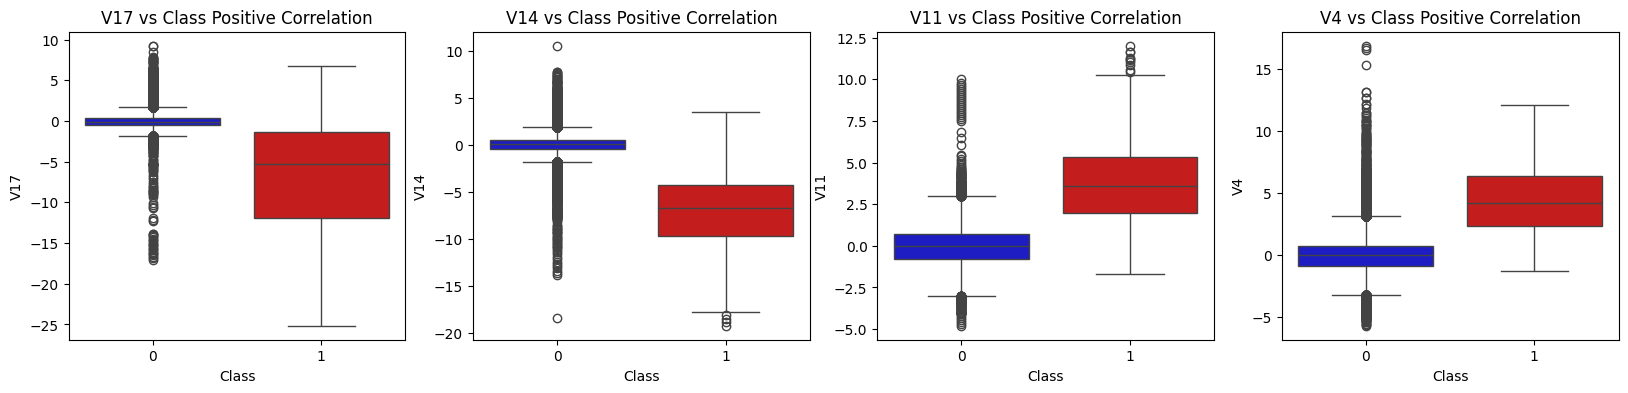

In [ ]:
colors = ["#0101DF", "#DF0101"]

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V4 vs Class Positive Correlation')

plt.show()

**Below we are using decision boundaries on each column to reduce the imbalanceness of the dataset. Effectively we are using a simple decision tree on the data and eliminating the entries which are easily seperable by using a decision boundary.**

In [ ]:
print(df.shape)
new_df=df
columns=df.columns
print(columns)
for i in range(1,29):
    column=columns[i]
    non_fraud_min=min(df_non_fraud[column])
    fraud_min=min(df_fraud[column])
    non_fraud_max=max(df_non_fraud[column])
    fraud_max=max(df_fraud[column])
#     print(fraud_min,non_fraud_min)
#     print(fraud_max,non_fraud_max)
    if non_fraud_min<fraud_min:
#         print(column)
        if fraud_min < 0:
            new_df=new_df[new_df[column]>=1.1*fraud_min]
        else:
            new_df=new_df[new_df[column]>=0.9*fraud_min]
    if non_fraud_max > fraud_max:
#         print(column)
        if fraud_max > 0:
            new_df=new_df[new_df[column]<=1.1*fraud_max]
        else:
            new_df=new_df[new_df[column]<=0.9*fraud_max]

print(new_df.shape)

df=new_df
print(df.shape)


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(229225, 31)
(229225, 31)


In [ ]:

# Splitting the DataFrame into two based on a condition in the 'Category' column
# For example, splitting into one DataFrame with category 'A' and another with the rest
df_fraud = df[df['Class'] == 1]
df_non_fraud = df[df['Class'] == 0]
# print(len(df_fraud))
# print(len(df_fraud))
print(f"percentage of fraud transactions : {round(len(df_fraud)/len(df)*100,4)}% ")
print(f"percentage of fraud transactions : {round(len(df_non_fraud)/len(df)*100,4)}% ")


# df_A contains rows with category 'A'
# df_others contains rows with categories other than 'A'


percentage of fraud transactions : 0.2146% 
percentage of fraud transactions : 99.7854% 


In [ ]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.
print(df.columns)
rob_scaler = RobustScaler()


df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.rename(columns={'scaled_amount':'Amount', 'scaled_time':'Time'}, inplace = True )
print(df.head())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
         V1        V2        V3        V4        V5        V6        V7  \
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9       V10  ...       V22       V23       V24       V25  \
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.0052

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
#     print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
# print(original_Xtrain.shape)
# print(original_Xtest.shape)
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.79 % of the dataset
Frauds 0.21 % of the dataset
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99785691 0.00214309]
[0.99784055 0.00215945]


In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)



print(original_ytrain.shape)
print(original_ytrain.sum())


print(ysm_train.shape)
print(ysm_train.sum())
print(ysm_train.mean())




(183380,)
393
(365974,)
182987
0.5


**logistic regression**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)



# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])

    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 183380 | Length of y (train): 183380
Length of X (test): 45845 | Length of y (test): 45845
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9525738902824736
precision: 0.07270634047565397
recall: 0.9087633885102239
f1: 0.13239929304240142
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(f"Logistic Regression:\n {classification_report(original_ytest, smote_prediction, target_names=labels)}")

Logistic Regression:
               precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     45746
       Fraud       0.14      0.87      0.25        99

    accuracy                           0.99     45845
   macro avg       0.57      0.93      0.62     45845
weighted avg       1.00      0.99      0.99     45845



**Support vector Classifier**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC




print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)
svc=SVC(kernel = 'rbf')

for i in range(3):

    X_train, X_test, y_train, y_test = train_test_split(Xsm_train, ysm_train, test_size=0.2, random_state=42)
    svc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svc.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")


    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    print(i)


# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_

# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# # grid_svc = GridSearchCV(SVC(), svc_params)

# rand_svc = RandomizedSearchCV(SVC(), svc_params, n_iter=5)


# grid_svc.fit(X_train, y_train)

# SVC best estimator
# svc = grid_svc.best_estimator_

# log_reg_sm = LogisticRegression()

# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


# rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters



# for train, test in sss.split(original_Xtrain, original_ytrain):
#     pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_svc) # SMOTE happens during Cross Validation not before..
#     model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
#     best_est = rand_svc.best_estimator_
#     prediction = best_est.predict(original_Xtrain[test])

#     accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
#     precision_lst.append(precision_score(original_ytrain[test], prediction))
#     recall_lst.append(recall_score(original_ytrain[test], prediction))
#     f1_lst.append(f1_score(original_ytrain[test], prediction))
#     auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 183380 | Length of y (train): 183380
Length of X (test): 45845 | Length of y (test): 45845
Accuracy: 0.9772252203019332
0
Accuracy: 0.9772252203019332
1
Accuracy: 0.9772252203019332
2
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9823863016686661
precision: 0.09672830725462304
recall: 0.8607594936708861
f1: 0.1739130434782609
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['No Fraud', 'Fraud']
svm_prediction = svc.predict(original_Xtest)
print(f"Support vector Classifier:\n {classification_report(original_ytest, svm_prediction, target_names=labels)}")

Support vector Classifier:
               precision    recall  f1-score   support

    No Fraud       1.00      0.99      1.00     45746
       Fraud       0.21      0.80      0.33        99

    accuracy                           0.99     45845
   macro avg       0.60      0.90      0.66     45845
weighted avg       1.00      0.99      1.00     45845



**Random Forest Classifier**

In [ ]:
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import numpy as np




rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(Xsm_train, ysm_train, test_size=0.2, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Train the classifier

# Predict on the test set

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"precision : {precision_score(original_ytrain[test], prediction)}")

print(f"recall : {recall_score(original_ytrain[test], prediction)}")

print(f"f1 score : {f1_score(original_ytrain[test], prediction)}")








Accuracy: 0.999945351458433
precision : 0.09672830725462304
recall : 0.8607594936708861
f1 score : 0.1739130434782609


In [ ]:
labels = ['No Fraud', 'Fraud']
rf_prediction = rf_classifier.predict(original_Xtest)
print(f"Random Forest Classifier:\n {classification_report(original_ytest, rf_prediction, target_names=labels)}")

Random Forest Classifier:
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     45746
       Fraud       0.99      0.67      0.80        99

    accuracy                           1.00     45845
   macro avg       0.99      0.83      0.90     45845
weighted avg       1.00      1.00      1.00     45845



**XGboost classifier**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, X_test, y_train, y_test are your training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fit the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


Accuracy: 0.9994764968917003
Precision: 0.9994609719420815
Recall: 0.9994764968917003
F1-score: 0.9994485035620586


In [ ]:
labels = ['No Fraud', 'Fraud']
xgb_prediction = xgb_classifier.predict(original_Xtest)
print(f"XGboost Classifier:\n {classification_report(original_ytest, xgb_prediction, target_names=labels)}")

XGboost Classifier:
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     45746
       Fraud       1.00      0.97      0.98        99

    accuracy                           1.00     45845
   macro avg       1.00      0.98      0.99     45845
weighted avg       1.00      1.00      1.00     45845

